 # The Sparks Foundation - GRIP - Data science and Business analytics- September'2021

# Task 1: Prediction using Supervised ML

# Name: Swetha V

## Dataset used: http://bit.ly/w-data

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk

### Importing dataset 

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)

### Data Exploration

In [3]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
x = data['Hours']
y = data['Scores']

### Splitting the dataset into train and test set

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [8]:
x_train

array([2.7, 3.3, 5.1, 3.8, 1.5, 3.2, 4.5, 8.9, 8.5, 3.5, 2.7, 1.9, 4.8,
       6.1, 7.8, 5.5, 7.7, 1.1, 7.4, 9.2])

In [9]:
y_train

array([25, 42, 47, 35, 20, 27, 41, 95, 75, 30, 30, 24, 54, 67, 86, 60, 85,
       17, 69, 88], dtype=int64)

In [10]:
x_test

array([8.3, 2.5, 2.5, 6.9, 5.9])

In [11]:
y_test

array([81, 30, 21, 76, 62], dtype=int64)

In [12]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

### Training the linear regression model 

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

### Plotting the regression line

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\matplotlib\cbook\__init__.py:1329: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\matplotlib\axes\_base.py:348: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\matplotlib\axes\_base.py:350: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


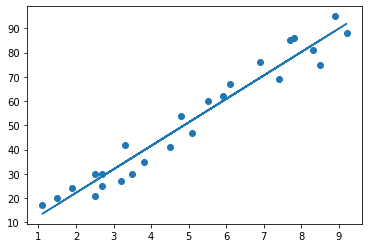

In [14]:
line = lr.coef_*x+lr.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

### Predicting the Results

In [15]:
y_pred = lr.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


### Comparing actual and predicted values 

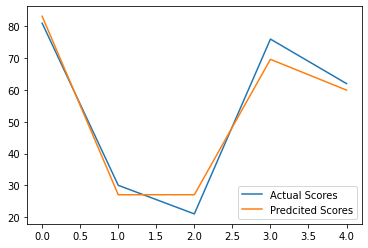

In [16]:
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(["Actual Scores", "Predcited Scores"], loc ="lower right") 
plt.show()

### Checking the mean absolute error and root mean squared error

In [17]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 3.9207511902099244
Root Mean Squared Error: 4.352380006653288


### What will be the predicted score if a student studies for 9.25 hrs/ day?

In [18]:
hours = 9.25
hours = np.array(hours).reshape(-1,1)
own_pred = lr.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.38611528261494
